Problem statement:

-To build a machine learning model which predicts the sale price of a used car

In [1]:
#linear algebra

import numpy as np

#data processing

import pandas as pd

#data visualization

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#algorithms

from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor , GradientBoostingRegressor
from xgboost import XGBRegressor

#importing metrics

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error,mean_squared_log_error

In [2]:
#loading the data

df = pd.read_excel("usedcarsdata.xlsx")
                       
print(df.shape)

(10028, 9)


In [3]:
df.sample(10)

,Unnamed: 0,ModelName,Variant,TransmissionType,FuelType,ModelYear,KilometersDriven,SalePrice,Location
2424,2424,Mahindra Quanto,C6,Manual,Diesel,2012,"81,000",3.51 Lakh,Mumbai
4618,4618,Mahindra XUV500,W5 BSIV,Manual,Diesel,2019,"29,000",14.50 Lakh,Banglore
513,513,BMW 7 Series,730Ld M Sport,Automatic,Diesel,2020,"18,000",1.05 Cr,Delhi/NCR
5006,5006,Maruti Swift Dzire,VXI 1.2,Manual,Petrol,2019,"54,919",7.55 Lakh,Banglore
9368,9368,MG Hector,Sharp DCT,Automatic,Petrol,2020,"3,800",19.95 Lakh,Jaipur
9987,9987,Maruti Ignis,1.2 Delta BSIV,Manual,Petrol,2018,"20,000",4.80 Lakh,Agra
5175,5175,Mercedes-Benz C-Class,C 250 CDI Elegance,Automatic,Diesel,2010,"74,000",11.25 Lakh,Banglore
159,159,Maruti Swift Dzire,AMT ZDI,Automatic,Diesel,2016,"78,630",5.19 Lakh,Delhi/NCR
5789,5789,Maruti Ciaz,VDi Plus SHVS,Manual,Diesel,2016,"66,000",5.25 Lakh,Hyderabad
319,319,Maruti Celerio,ZXI,Manual,Petrol,2015,"83,206",3.30 Lakh,Delhi/NCR


# Data Cleaning:

- So first we are going to remove the unnamed column, as it is totally unnecessary.
- Then we are going to look out for missing values and replace them accordingly.
- Afterwards we are going to check out for datatypes of the variables and do the necessary modification

In [4]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.sample()

,ModelName,Variant,TransmissionType,FuelType,ModelYear,KilometersDriven,SalePrice,Location
6465,Honda Jazz,1.2 S i VTEC,Manual,Petrol,2015,"24,000",5.95 Lakh,Chennai


In [5]:
#now let's check out for duplicate data that might be present in the dataset

dfdup=df[df.duplicated()]
dfdup

,ModelName,Variant,TransmissionType,FuelType,ModelYear,KilometersDriven,SalePrice,Location
168,Maruti Swift,ZXI BSIV,Manual,Petrol,2016,"87,436",4.91 Lakh,Delhi/NCR
266,Renault Duster,85PS Diesel RxL Optional,Manual,Diesel,2012,"1,37,227",2.65 Lakh,Delhi/NCR
268,Maruti Swift,AMT ZXI,Automatic,Petrol,2018,"77,283",5.65 Lakh,Delhi/NCR
360,Ford Ecosport,1.5 Diesel Ambiente BSIV,Manual,Diesel,2020,"24,000",8.30 Lakh,Delhi/NCR
400,BMW 3 Series GT,Luxury Line,Automatic,Diesel,2018,"10,110",36.99 Lakh,Delhi/NCR
...,...,...,...,...,...,...,...,...
7197,Renault Duster,Petrol RXS CVT,Automatic,Petrol,2017,"20,462",6.94 Lakh,Kolkata
7527,Maruti Ciaz,1.3 Delta,Manual,Diesel,2017,"43,600",5.65 Lakh,Kolkata
8648,Maruti Baleno,1.2 CVT Alpha,Automatic,Petrol,2021,"5,000",9.25 Lakh,Ahemdabad
8924,Maruti Swift,VDI BSIV,Manual,Diesel,2015,"60,000",2.40 Lakh,Chandigarh


- So the dataset has 145 duplicate rows, we are going to drop them as duplicated data isn't of very use

In [6]:
#checking shape of dataset 
df.shape

(10028, 8)

In [7]:
#removing duplicated rows from the dataset
df.drop_duplicates(inplace=True)

#again checking for shape of the now data
df.shape

(9883, 8)

In [8]:
#Now, lets checking for missing values

df.isnull().sum()

ModelName           0
Variant             0
TransmissionType    0
FuelType            0
ModelYear           0
KilometersDriven    0
SalePrice           0
Location            0
dtype: int64

- So the dataset has no missing values present

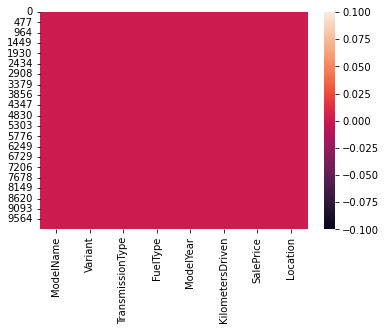

In [9]:
sns.heatmap(df.isnull())
plt.show()

In [10]:
#now checking for datatypes

df.dtypes

ModelName           object
Variant             object
TransmissionType    object
FuelType            object
ModelYear            int64
KilometersDriven    object
SalePrice           object
Location            object
dtype: object

- The target variable i.e. SalePrice has been assigned 'object' datatype which is certainly wrong as it should be of numeric datatype

- Kilometers driver should also be numeric variable

In [11]:
df['SalePrice']

0        5.85 Lakh
1        5.48 Lakh
2        4.11 Lakh
3        8.05 Lakh
4        5.85 Lakh
           ...    
10023    3.85 Lakh
10024    9.80 Lakh
10025    4.00 Lakh
10026    2.90 Lakh
10027    1.05 Lakh
Name: SalePrice, Length: 9883, dtype: object

- Now for SalePrice, we are going to convert Cr value to lakh only so that the range of data in numbers remain not much wide

In [12]:
df['SalePrice']=df['SalePrice'].str.replace(" Lakh", '')          #first replacing Lakh with an empty string     

df['SalePrice']=df['SalePrice'].str.replace(" Cr", '*100').apply(eval)   #converting Cr values with their values in lakh 

df['SalePrice'] = pd.to_numeric(df['SalePrice'])        #now converting into numeric variable

In [13]:
dfthous=df['SalePrice'].nlargest(n=111)                #checking for top maximum values of SalePrice
dfthous

3319     99999.0
4916     99999.0
1635     99000.0
7588     99000.0
8888     99000.0
          ...   
9795     37000.0
9810     37000.0
8225     35000.0
9539     35000.0
10018    30000.0
Name: SalePrice, Length: 111, dtype: float64

- Turning out there are 111 SalePrice value in thousand rupees while most of the data is in lakh terms and a few in crore , if we convert the other two in thousands the numbers would be so big, so we are going to drop the rows having the rupees in thousands 

In [14]:
dfdel=list(dfthous.index)          #making a list for rupees in thousands prices

df.drop(dfdel,inplace=True)        #dropping the data from the dataset

df['SalePrice'].max()              #checking for maximum value

170.0

-The maximum price is 170 lakhs which is 1.70 Crore

In [15]:
df['KilometersDriven']           #now checking for Kilometersdriven

0          39,571
1          36,633
2        1,28,542
3          38,165
4          68,226
           ...   
10023      80,000
10024      23,000
10025      20,000
10026    1,37,000
10027      10,300
Name: KilometersDriven, Length: 9772, dtype: object

In [16]:
 df['KilometersDriven'] = df['KilometersDriven'].str.replace(',','')            #replcaing the period with an empty string

df['KilometersDriven'] = pd.to_numeric(df['KilometersDriven'])                 #converting to numeirc variable

In [17]:
#now checking for datatypes

df.dtypes

ModelName            object
Variant              object
TransmissionType     object
FuelType             object
ModelYear             int64
KilometersDriven      int64
SalePrice           float64
Location             object
dtype: object

# Exploratory Data Analysis:

In [18]:
#checking the variables

df.columns

Index(['ModelName', 'Variant', 'TransmissionType', 'FuelType', 'ModelYear',
       'KilometersDriven', 'SalePrice', 'Location'],
      dtype='object')

In [19]:
#getting additional info about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10027
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ModelName         9772 non-null   object 
 1   Variant           9772 non-null   object 
 2   TransmissionType  9772 non-null   object 
 3   FuelType          9772 non-null   object 
 4   ModelYear         9772 non-null   int64  
 5   KilometersDriven  9772 non-null   int64  
 6   SalePrice         9772 non-null   float64
 7   Location          9772 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 687.1+ KB


In [20]:
#further describing our dataset

df.describe()

,ModelYear,KilometersDriven,SalePrice
count,9772.000000,9.772000e+03,9772.000000
mean,2015.459988,5.777794e+04,9.281357
std,3.523527,4.981026e+04,11.058007
min,1990.000000,1.450000e+02,1.000000
25%,2013.000000,3.200000e+04,3.850000
50%,2016.000000,5.300000e+04,5.960000
75%,2018.000000,7.576050e+04,9.700000
max,2022.000000,2.171000e+06,170.000000


- the oldest model year is 1990 and the newest model is of 2022, present in the dataset

- minimum sale price is 1 lakh while the maximum is 1.70 crore

In [21]:
#checking out different classes or labels present in the variables

for i in df.columns:
    print(df[i].value_counts(),'\n\n')

Honda City                   538
Hyundai i20                  440
Hyundai Grand i10            314
Hyundai Creta                309
Maruti Swift Dzire           306
                            ... 
Hindustan Motors Contessa      1
Maserati Ghibli                1
Maruti Ciaz S                  1
Mercedes-Benz GLC Coupe        1
Hyundai Xcent Prime            1
Name: ModelName, Length: 297, dtype: int64 


VXI                         262
LXI                         173
Sportz                      137
Magna                       114
VDI                         114
                           ... 
2.5 GX (Diesel) 8 Seater      1
1.6 TDI Active Plus           1
L and K 1.9 TDI MT            1
L and K 1.9 TDI (MT)          1
SX Opt Sport iMT              1
Name: Variant, Length: 2162, dtype: int64 


Manual       7173
Automatic    2599
Name: TransmissionType, dtype: int64 


Petrol      5702
Diesel      3890
CNG          146
Electric      18
LPG           16
Name: FuelType, dtype: int64 


2

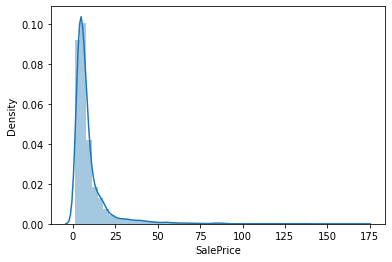

In [22]:
#plotting the target variable

sns.distplot(df['SalePrice'])
plt.show()

- The dataset doesn't have very much outliers present
- The data is right skewed though skewness isn't much great too

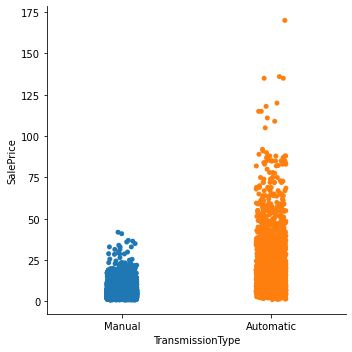

In [23]:
#plotting TransmissionType and SalePrice

sns.catplot('TransmissionType','SalePrice',data=df)
plt.show()

- Automatic transmission cars price is higher than manual ones

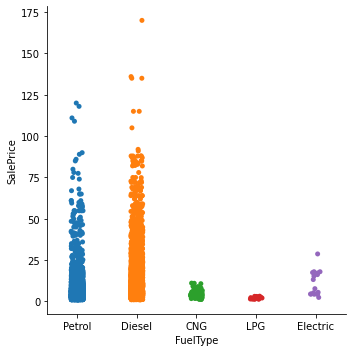

In [24]:
#plotting FuelType and SalePrice

sns.catplot('FuelType','SalePrice',data=df)
plt.show()

- Diesel fuel vehicles are costlier than other fuel types
- LPG vehicles have cheapest prices

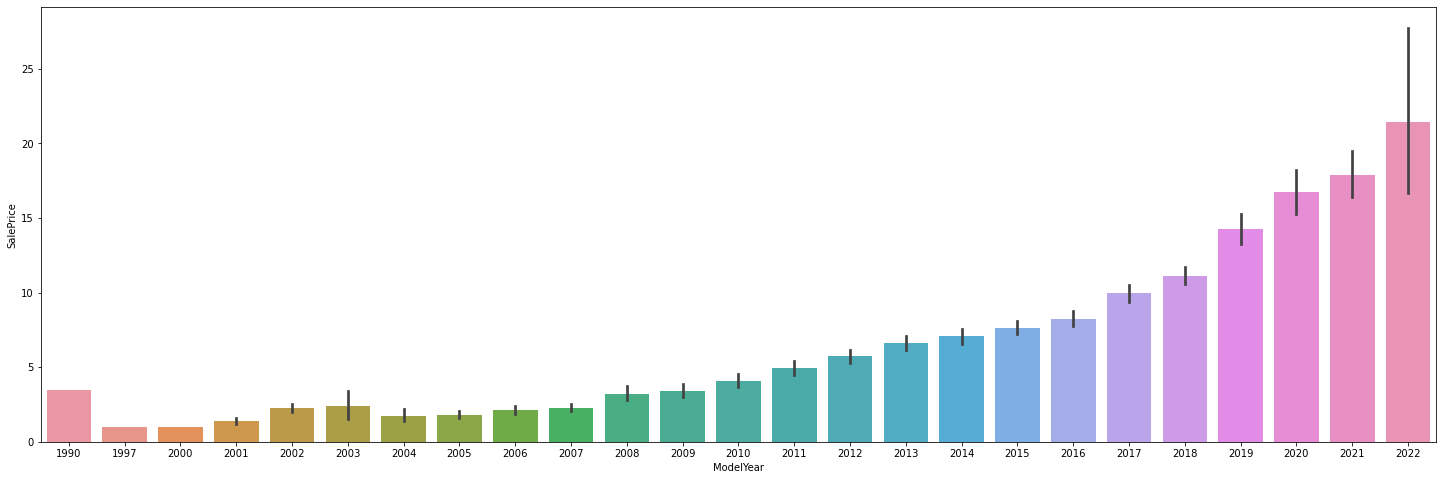

In [25]:
#plotting ModelYear and SalePrice

plt.figure(figsize=(25,8))
sns.barplot('ModelYear','SalePrice',data=df)
plt.show()

- from model year 2004, the sale prices are increasing gradually
- Model year 2022 have the highest car prices
- Model year 1997 has the lowest car prices
- Model year 1990 has higher sale prices than model year 1997 to 2008 

<Figure size 1080x504 with 0 Axes>

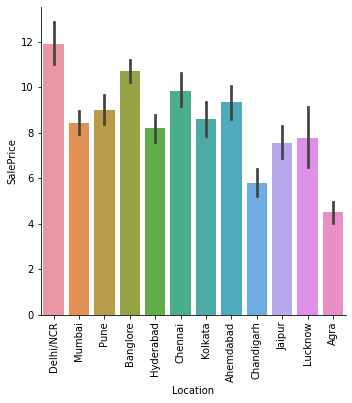

In [27]:
#plotting owner and SalePrice

plt.figure(figsize=(15,7))
sns.catplot('Location','SalePrice',data=df,kind='bar')
plt.xticks(rotation=90)
plt.show()

- Delhi/NCR region has the highest sale prices following by Banglore and then Chennai
- Agra location has the lowest sale prices

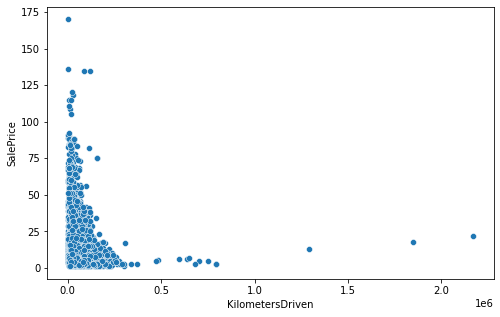

In [29]:
#plotting kilometersdriven and saleprice

plt.figure(figsize=(8,5))
sns.scatterplot('KilometersDriven','SalePrice',data=df)
plt.show()

- lesser the kilometers driven higher the prices
- cars that have been driven more than 2 lakh kms have very low price 

# Data Preprocessing:

In [18]:
df.columns

Index(['ModelName', 'Variant', 'TransmissionType', 'FuelType', 'ModelYear',
       'KilometersDriven', 'SalePrice', 'Location'],
      dtype='object')

#dropping ModelName and Variant from dataset has they dont have much importance

In [19]:
df.drop(['ModelName','Variant'],axis=1,inplace=True)

In [20]:
#checking for skewness

df.skew()

ModelYear           -0.702672
KilometersDriven    16.473128
SalePrice            4.339030
dtype: float64

- threshold = +/- 0.6 , so KilometersDriven and SalePrice have skewness present which needs to reduced

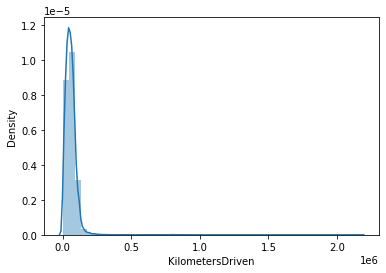

In [32]:
sns.distplot(df['KilometersDriven'])
plt.show()

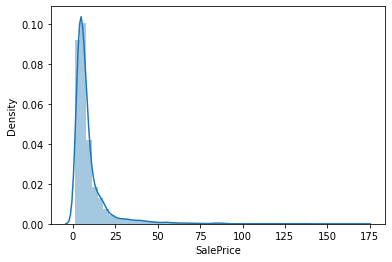

In [59]:
sns.distplot(df['SalePrice'])
plt.show()

In [21]:
#using log transformation and cube-root transformation for skewness removal

df['KilometersDriven'] = np.cbrt(df['KilometersDriven'])
df['SalePrice'] = np.log(df['SalePrice'])

#checking for skewness

df.skew()

ModelYear          -0.702672
KilometersDriven    0.156399
SalePrice           0.611522
dtype: float64

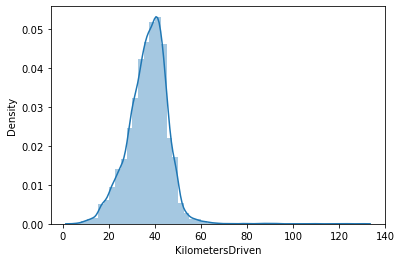

In [61]:
sns.distplot(df['KilometersDriven'])
plt.show()

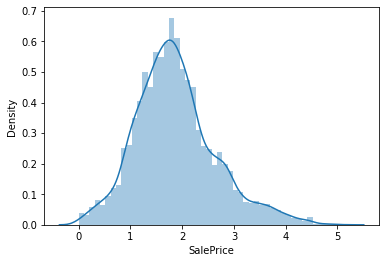

In [62]:
sns.distplot(df['SalePrice'])
plt.show()

- skewness has been reduced and the data is scaled as well

In [63]:
#checking for datatypes

df.dtypes

ModelName            object
Variant              object
TransmissionType     object
FuelType             object
ModelYear             int64
KilometersDriven    float64
SalePrice           float64
Location             object
dtype: object

In [22]:
#converting categorical variables into numerical ones using LabelEncoder

from sklearn.preprocessing import LabelEncoder

cat=['TransmissionType','FuelType','Location']     #creating a list of categorical variables

for i in cat:
    df[i] = LabelEncoder().fit_transform(df[i])

In [65]:
#checking out correlation matrix 

df.corr()

,TransmissionType,FuelType,ModelYear,KilometersDriven,SalePrice,Location
TransmissionType,1.000000,0.082552,-0.142807,0.134754,-0.546508,-0.006026
FuelType,0.082552,1.000000,0.016780,-0.304005,-0.322044,0.032701
ModelYear,-0.142807,0.016780,1.000000,-0.563585,0.565915,0.008067
KilometersDriven,0.134754,-0.304005,-0.563585,1.000000,-0.300236,-0.041968
SalePrice,-0.546508,-0.322044,0.565915,-0.300236,1.000000,-0.052077
Location,-0.006026,0.032701,0.008067,-0.041968,-0.052077,1.000000


In [66]:
#checking correlation with target variable of input variables

df.corr()['SalePrice'].sort_values()

TransmissionType   -0.546508
FuelType           -0.322044
KilometersDriven   -0.300236
Location           -0.052077
ModelYear           0.565915
SalePrice           1.000000
Name: SalePrice, dtype: float64

- Model year, TransmissionType Fuel type and kilometers driven are most correlated with the target variable

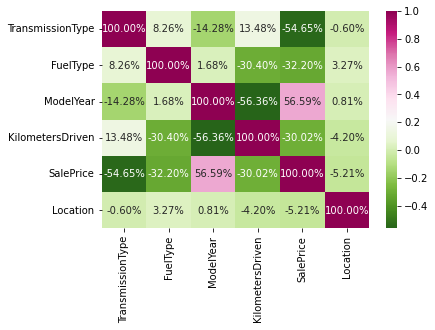

In [67]:
#plotting a heatmap

sns.heatmap(df.corr(),annot=True,fmt='.2%',cmap='PiYG_r')
plt.show()

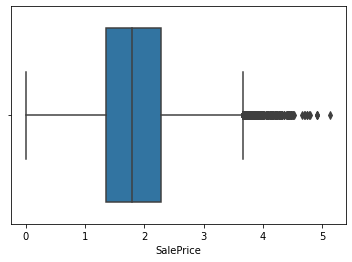

In [72]:
#now checking for outliers

sns.boxplot(df['SalePrice'])
plt.show()

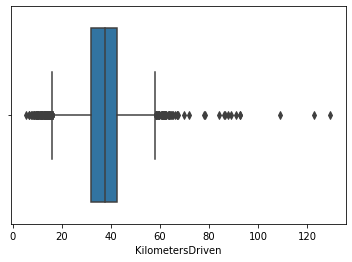

In [73]:
sns.boxplot(df['KilometersDriven'])
plt.show()

- There are outliers present in the dataset, let's checkout them using zscore 

In [23]:
#outliers using zscore

from scipy.stats import zscore

z=np.abs(zscore(df))

np.where(z>3)

(array([  19,  146,  347,  358,  420,  425,  485,  507,  546,  585,  622,
         623,  654,  655,  665,  673,  690,  708,  804,  842,  856,  858,
         880,  915, 1048, 1049, 1296, 1342, 1593, 1626, 1632, 1685, 1687,
        1698, 1712, 1732, 1845, 2028, 2034, 2148, 2181, 2198, 2333, 2524,
        2646, 2854, 2929, 2931, 3335, 3522, 3583, 3600, 3642, 3682, 3721,
        3729, 3729, 3811, 3870, 3883, 3935, 3946, 3946, 3952, 3963, 3995,
        4044, 4056, 4138, 4249, 4315, 4359, 4505, 4515, 4524, 4527, 4573,
        4632, 4737, 4762, 4775, 4797, 5023, 5071, 5121, 5356, 5411, 5452,
        5462, 5498, 5582, 5627, 5636, 5656, 5712, 5765, 5765, 5766, 5834,
        5878, 5913, 5918, 5981, 6017, 6036, 6042, 6209, 6221, 6245, 6291,
        6294, 6379, 6481, 6492, 6526, 6550, 6629, 6632, 6664, 6681, 6811,
        6817, 7077, 7286, 7325, 7326, 7335, 7398, 7404, 7522, 7541, 7661,
        7718, 7899, 8000, 8082, 8204, 8243, 8388, 8397, 8418, 8445, 8524,
        8525, 8547, 8605, 8694, 8698, 

In [24]:
#so outliers are present, so we will remove them or keep them, it won't affect our model majorily

df_new=df[(z<3).all(axis=1)]

In [25]:
df.shape     #checking the shape of dataset with outliers

(9772, 6)

In [26]:
df_new.shape       #checking the shape of dataset without outliers

(9613, 6)

In [27]:
print("Data Loss is:",(9772-9613)/9772*100,'%')         #printing the data loss in removing outliers

Data Loss is: 1.6270978305362258 %


- As the data loss is around 1% only, we will use dataset without outliers

# Feature Selection:

- not including ModelName and Variant for input variables as they shouldn't have much importance in building the models

In [57]:
x = df_new.drop('SalePrice',axis=1)
y = df_new['SalePrice']

print('x:',x.shape)
print('y:',y.shape)

x: (9613, 5)
y: (9613,)


In [29]:
x

,TransmissionType,FuelType,ModelYear,KilometersDriven,Location
0,1,4,2017,34.076816,5
1,1,4,2017,33.211679,5
2,1,4,2017,50.467875,5
3,1,1,2015,33.668344,5
4,0,4,2014,40.861719,5
...,...,...,...,...,...
10023,1,1,2010,43.088694,0
10024,1,4,2020,28.438670,0
10025,1,4,2016,27.144176,0
10026,1,1,2010,51.551367,0


In [58]:
from sklearn.preprocessing import StandardScaler        #scaling the data

x=StandardScaler().fit_transform(x)

# Building Models:

1. Linear Regression

In [62]:
lr=LinearRegression()

#checking best random state

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=.33)
    lr.fit(x_train,y_train)
    predtrain=lr.predict(x_train)
    predlr=lr.predict(x_test)
    if round(r2_score(y_test,predlr)*100)==round(r2_score(y_train,predtrain)*100):
        print('At random state',i,'the model performs very well')
        print('At random state',i,':')
        print('Training accuracy score is',r2_score(y_train,predtrain)*100)
        print('Testing accuracy score is',r2_score(y_test,predlr)*100,'\n')

At random state 10 the model performs very well
At random state 10 :
Training accuracy score is 62.499293842422865
Testing accuracy score is 62.475162451963726 



In [63]:
#checking error for LinearRegression

mselr=mean_squared_error(y_test,predlr)
maelr=mean_absolute_error(y_test,predlr)
print(mselr)
print(maelr)

0.21884783208170677
0.36443507017245624


2. Regularization:
- Lasso
- Ridge

In [69]:
#Lasso

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.33)
ls=Lasso()
ls.fit(x_train,y_train)
predtrain=ls.predict(x_train)
predls=ls.predict(x_test)

In [70]:
#checking error for Lasso 

msels=mean_squared_error(y_test,predls)
maels=mean_absolute_error(y_test,predls)
print(msels)
print(maels)

0.5584064464430223
0.5817776881765786


In [72]:
#Ridge

lrr=Ridge()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.33)
lrr.fit(x_train,y_train)
predlrr=lrr.predict(x_test)
print(r2_score(y_test,predlrr)*100)

62.47408944215385


In [101]:
#checking error for Ridge

mselrr=mean_squared_error(y_test,predlrr)
maelrr=mean_absolute_error(y_test,predlrr)
print(mselrr)
print(maelrr)

0.20950171884496108
0.35781177228463606


3. KNeighbors

In [102]:
#KNeighbors

knn=KNeighborsRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.33)
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(r2_score(y_test,predknn)*100)

55.98880868606349


In [103]:
#checking error for KNeighbors

mseknn=mean_squared_error(y_test,predknn)
maeknn=mean_absolute_error(y_test,predknn)
print(mseknn)
print(maeknn)

0.24571529170952025
0.370661106771423


4. DecisionTree

In [104]:
#DecisionTree

dtc=DecisionTreeRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.33)
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print(r2_score(y_test,preddtc)*100)

41.58264783820383


In [105]:
#checking error for DecisionTree

msedtc=mean_squared_error(y_test,preddtc)
maedtc=mean_absolute_error(y_test,preddtc)
print(msedtc)
print(maedtc)

0.32614515305765407
0.4243194579374122


5. Ensemble:
- AdaBoost
- RandomForest
- GradientBoosting

In [106]:
#AdaBoost

ada=AdaBoostRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.33)
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
print(r2_score(y_test,predada)*100)

59.96087515437216


In [107]:
#checking error for AdaBoost

mseada=mean_squared_error(y_test,predada)
maeada=mean_absolute_error(y_test,predada)
print(mseada)
print(maeada)

0.22353917145891913
0.3702796110816887


In [110]:
#RandomForest

rf=RandomForestRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.33)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(r2_score(y_test,predrf)*100)

63.73434460795371


In [111]:
#checking error for RandomForest

mserf=mean_squared_error(y_test,predrf)
maerf=mean_absolute_error(y_test,predrf)
print(mserf)
print(maerf)

0.20247182199932504
0.3377761866665455


In [108]:
#Gradient Boosting

gb=GradientBoostingRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.33)
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
print(r2_score(y_test,predgb)*100)

68.60937099832394


In [109]:
#checking error for GradientBoosting

msegb=mean_squared_error(y_test,predgb)
maegb=mean_absolute_error(y_test,predgb)
print(msegb)
print(maegb)

0.17525445987302157
0.3120775482121885


6. XGBoost

In [113]:
#XGBoost

xgb=XGBRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.33)
xgb.fit(x_train,y_train)
predxgb=xgb.predict(x_test)
print(r2_score(y_test,predxgb)*100)

67.8107387642834


In [114]:
#checking error for GradientBoosting

msexgb=mean_squared_error(y_test,predxgb)
maexgb=mean_absolute_error(y_test,predxgb)
print(msexgb)
print(maexgb)

0.17971323834498157
0.31760370385872344


# Best Model?

In [115]:
results = pd.DataFrame({'Mean Squared Error':[mselr,msels,mselrr,mseknn,msedtc,mseada,msegb,mserf,msexgb],'Mean Absolute Error':[maelr,maels,maelrr,maeknn,maedtc,maeada,maegb,maerf,maexgb],'Accuracy Score':[r2_score(y_test,predlr),r2_score(y_test,predls),r2_score(y_test,predlrr),r2_score(y_test,predknn),r2_score(y_test,preddtc),r2_score(y_test,predada),r2_score(y_test,predgb),r2_score(y_test,predrf),r2_score(y_test,predxgb)]},index=['LinearRegression','Lasso','Ridge','KNeighborsRegressor','DecisionTreeClassifier','AdaBoostRegressor','GradientBoostingRegressor','RandomForestRegressor','XGBRegressor'])
result_df = results.sort_values(by='Accuracy Score', ascending=False)
result_df

,Mean Squared Error,Mean Absolute Error,Accuracy Score
GradientBoostingRegressor,0.175254,0.312078,0.686094
XGBRegressor,0.179713,0.317604,0.678107
RandomForestRegressor,0.202472,0.337776,0.637343
Ridge,0.209502,0.357812,0.624752
LinearRegression,0.209502,0.357819,0.624752
AdaBoostRegressor,0.223539,0.370280,0.599609
KNeighborsRegressor,0.245715,0.370661,0.559888
DecisionTreeClassifier,0.326145,0.424319,0.415826
Lasso,0.472075,0.530769,0.154445


- So as GradientBoostingRegressor model is working the best so far, with lowest errors, let's checkout for cross validation score before jumping onto conclusions

In [118]:
#Cross validation for Gradient Boosting

gb = GradientBoostingRegressor()
scores = cross_val_score(gb, x, y, cv=10)
print("Scores:", scores,'\n')
print("Mean:", scores.mean(),'\n')
print("Standard Deviation:", scores.std())

Scores: [0.68892747 0.61099827 0.69093767 0.71733044 0.6793691  0.65009281
 0.68628653 0.63410298 0.64201789 0.57300563] 

Mean: 0.6573068779860471 

Standard Deviation: 0.041395272331228805


- So this means that the model is perfoming fine with gbr,the mean of the scores is 65% for our model and standard deviation in our case means that the score can differ with +/- 4%

In [119]:
#lets checkout the feature importance 

gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances

,importance
feature,
TransmissionType,0.295
ModelYear,0.290
KilometersDriven,0.223
FuelType,0.107
Location,0.085


<AxesSubplot:xlabel='feature'>

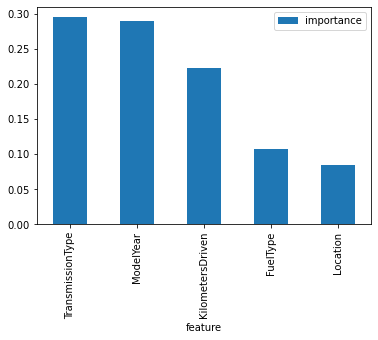

In [120]:
importances.plot.bar()

- Location has a very low feature importance , so let's drop it and try building a model again

In [121]:
x.drop('Location',axis=1,inplace=True)

In [123]:
gb = GradientBoostingRegressor()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.33)

gb.fit(x_train,y_train)
y_prediction = gb.predict(x_test)

acc_gb=round(r2_score(y_test, y_prediction)*100,2)
print(acc_gb,"%")

66.58 %


# Hyperparameter Tuning:

In [126]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [127]:
gb=GradientBoostingRegressor()

In [130]:
param_grid1 = {"n_estimators":[i for i in range(1,100)]}
search = HalvingGridSearchCV(gb, param_grid1).fit(x, y)
search.best_params_  

{'n_estimators': 100}

In [131]:
param_grid2 = {'max_depth':range(5,100,5), 'min_samples_split':range(200,1001,200)}
search = HalvingGridSearchCV(gb, param_grid2).fit(x, y)
search.best_params_  

{'max_depth': 5, 'min_samples_split': 800}

In [134]:
param_grid3 = {'min_samples_leaf':range(1,100)}
search = HalvingGridSearchCV(gb, param_grid3).fit(x, y)
search.best_params_  

{'min_samples_leaf': 29}

In [136]:
param_grid4 = {'learning_rate':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]}
search = HalvingGridSearchCV(gb, param_grid4).fit(x, y)
search.best_params_

{'learning_rate': 0.1}

In [137]:
param_grid5 = {'max_features' : ['auto', 'sqrt', 'log2'] ,'criterion' : ['friedman_mse', 'squared_error', 'mse', 'mae'] }
search = HalvingGridSearchCV(gb, param_grid5).fit(x, y)
search.best_params_

{'criterion': 'mse', 'max_features': 'log2'}

In [138]:
param_grid6 = {'loss' : ['squared_error', 'absolute_error', 'huber', 'quantile']}
search = HalvingGridSearchCV(gb, param_grid6).fit(x, y)
search.best_params_

{'loss': 'squared_error'}

# Evaluation:

1. Mean Absolute Error

In [150]:
print('Mean Absolute Error:',mean_absolute_error(y_test,predgb))

Mean Absolute Error: 0.320839307152059


2. Mean Squared Error

In [151]:
print('Mean Squared Error:',mean_squared_error(y_test,predgb))

Mean Squared Error: 0.18120203540952387


3. Root Mean Squared Error

In [152]:
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,predgb)))

Root Mean Squared Error: 0.42567832386618404


4. R Squared score

In [153]:
print('R Squared Score:',round(r2_score(y_test,predgb)*100,2),'%')

R Squared Score: 68.47 %


5. Mean Squared Log Error

In [156]:
print('Mean Squared Log Error:',mean_squared_log_error(y_test,predgb))

Mean Squared Log Error: 0.023301923294183607


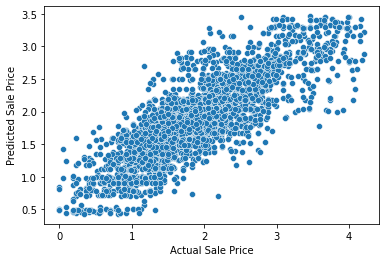

In [157]:
#now plotting both predicted and actual values

sns.scatterplot(y_test,predgb)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.show()

In [158]:
preddf=pd.DataFrame({'Actual Sale Price':y_test,'Predicted Sale Price':predgb})
preddf

,Actual Sale Price,Predicted Sale Price
2310,2.463853,2.607892
645,2.656757,2.586742
599,2.827314,2.820348
1360,1.994700,1.938848
6784,2.014903,1.668458
...,...,...
9367,1.235471,1.554547
8205,3.481240,2.633796
3809,2.277267,1.928418
3547,1.272566,1.602741


In [164]:
print('The model is performing well with Gradient Boosting Regressor','\n')
print('Accuracy Score:', round(r2_score(y_test,predgb)*100))
print('Cross Validation Score:', round(scores.mean()*100))

The model is performing well with Gradient Boosting Regressor 

Accuracy Score: 68
Cross Validation Score: 68


In [165]:
#saving the best model

import pickle
pickle.dump(gb,open('usedcarsaleprice.pkl','wb'))